<a href="https://colab.research.google.com/github/yoniamit/batlocations/blob/main/analyzelocations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Step1

#imports
import math
from datetime import datetime
import numpy as np

#Definations
xlb = 320.0  # x left basket
ylb = 410.0  # y left basket
xrb = 420.0  # x right basket
yrb = 60.0  # y right basket
basketradius = 40.0  # distance from the center of the basket which count as "IN"
accuracy_limit = 0.0  # Value for accuracy check #הוספתי
#data_read_path = "/content/drive/MyDrive/Python files/20210207-154302IrTimes.txt" #path_of data to read
data_read_path =  "/content/drive/MyDrive/Python files/20210223-205817IrTimes.txt"

data_write_path = "Filtered_Relevant_Data_Run_N.txt" #path of data to write
last_date = "0000"
day_number = 0
list_locations = []



data_write = open(data_write_path, "w")  # פתיחת קובץ חדש לרשימת הדאטה
f = open(data_read_path, "r")
data = Lines = f.readlines()

for line in data:
    columns = line.split(",")
    #print(columns[13] + " " + columns[14])

    xydata = columns[14].split(" ")
    xydata = [x for x in xydata if x]
    xy_accuracy_data = columns[15].split(" ")  # הוספתי
    xy_accuracy_data = [x for x in xy_accuracy_data if x]  # הוספתי
    if (len(xydata) != 2) or (len(xy_accuracy_data) != 2):  # הוספתי
        continue

    x_accuracy_data = (float(xy_accuracy_data[0].replace("[", "").replace("]", "")))  # הוספתי
    y_accuracy_data = (float(xy_accuracy_data[1].replace("[", "").replace("]", "")))  # הוספתי
    if (y_accuracy_data > accuracy_limit) or (x_accuracy_data > accuracy_limit):  # הוספתי
        continue

    x = (float(xydata[0].replace("[", "").replace("]", "")))
    y = (float(xydata[1].replace("[", "").replace("]", "")))
    dt = datetime.strptime(columns[0] + " " + columns[1] ,  "%Y%m%d %H%M%S").timestamp()  #20210104
    t = np.array([int(columns[13]), dt, x, y])
    list_locations += [t]

list_array = np.array(list_locations)

f.close()
data_write.close()
print("Done! Part1!")





Done! Part1!


In [60]:
#Defenitions
per_unit = 10
minimum_time = np.min(list_array[:,1])
maximum_time = np.max(list_array[:,1])
time_now = minimum_time
list_tag = np.unique(list_array[:,0])
main_data = np.zeros((len(list_tag),int((maximum_time-minimum_time)/per_unit), 2))
t = 0

print(list_array[:,1])
print(minimum_time, maximum_time)
print(type(list_tag[0]))

tagids  = list_array[:,0]
dates = list_array[:,1]



while time_now <= (maximum_time - per_unit):
  for a in range(len(list_tag)):
    main_data[a,t,:] = np.mean(list_array[(tagids == list_tag[a]) & (dates> time_now) & (dates< (time_now + per_unit)) ,2:4],axis = 0)
  t += 1  
  time_now += per_unit



print("Done! Part2!")

[1.61411390e+09 1.61411390e+09 1.61411390e+09 ... 1.61453105e+09
 1.61453107e+09 1.61453110e+09]
1614113898.0 1614531103.0
<class 'numpy.float64'>


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Done! Part2!


In [61]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]



In [62]:
for a in range(len(list_tag)):
    y = main_data[a,:,:]
    nans, x= nan_helper(y)
    y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    main_data[a,:,:] = y
print("Done! Part3!")

Done! Part3!


In [53]:
import matplotlib.pyplot as plt
batid=6
plt.figure()
plt.scatter(main_data[batid,:, 0], main_data[batid,:, 1])
plt.show()

IndexError: ignored

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(main_data[6,:,0])
plt.show()

IndexError: ignored

<Figure size 432x288 with 0 Axes>

In [63]:


time_now = minimum_time
t = 0
distance_array = np.zeros((len(list_tag),int((maximum_time-minimum_time)/per_unit)))

while time_now <= (maximum_time - per_unit):
  for a in range(len(list_tag)):
    my_pos = main_data[a,t,:]
    all_pos = main_data[:,t,:]
    other_bats_pos = np.delete(all_pos,a, 0)
    dist = []
    for pos in other_bats_pos:
      dist += [np.mean(np.linalg.norm(my_pos - pos))]
    dist = np.array(dist)
    dist = np.mean(dist)
    distance_array[a,t] = dist
  t += 1  
  time_now += per_unit

print(distance_array)

[[221.90767203 223.30998947 224.39522316 ...  10.34814809   2.82842712
    2.82842712]
 [273.92589312 272.43432317 274.08140913 ...   9.29705627   1.69705627
    1.69705627]
 [258.46459995 258.0670717  259.12125862 ...   9.29705627   1.69705627
    1.69705627]
 [265.32751117 264.85915029 265.91404859 ...   9.29705627   1.69705627
    1.69705627]
 [192.42874754 192.14399892 192.79724759 ...  12.61502467   7.35391052
    7.35391052]
 [272.07574688 264.20049984 264.57043589 ...  37.27789139   1.69705627
    1.69705627]]


In [64]:
time_now = minimum_time + per_unit
t = 1
movment_array = np.zeros((len(list_tag),int((maximum_time-minimum_time)/per_unit)))

while time_now <= (maximum_time - per_unit):
  for a in range(len(list_tag)):
    my_pos = main_data[a,t,:]
    mt_prev_pos = main_data[a,t -1,:]
    thedistance = np.linalg.norm(my_pos - mt_prev_pos)
    movment_array[a,t-1] = (thedistance )
  t += 1  
  time_now += per_unit

print(movment_array)
correlations = []
for a in range(len(list_tag)):
  correlations.append(np.correlate(movment_array[a,:],distance_array[a,:]))


correlations = np.array(correlations)
print(correlations)

[[  1.60078106   2.12132034   0.68718427 ...   0.           0.
    0.        ]
 [  5.25         2.06155281   3.80788655 ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.         147.         ...   0.           0.
    0.        ]
 [  0.75         0.70710678   0.79056942 ...   0.           0.
    0.        ]
 [ 27.70729948   0.70710678  40.47667367 ...  38.           0.
    0.        ]]
[[1.35757332e+08]
 [2.28916819e+08]
 [1.60230276e+08]
 [1.47103977e+08]
 [2.46197298e+08]
 [1.55839945e+08]]


[[383.66925688 388.64492013]
 [468.4557478   92.00727478]
 [178.70657725  73.99970684]
 [496.05764104 366.30195974]
 [141.46912477 145.27559895]]
[0.17025258 0.22575903 0.13275716 0.40178189 0.06944935]


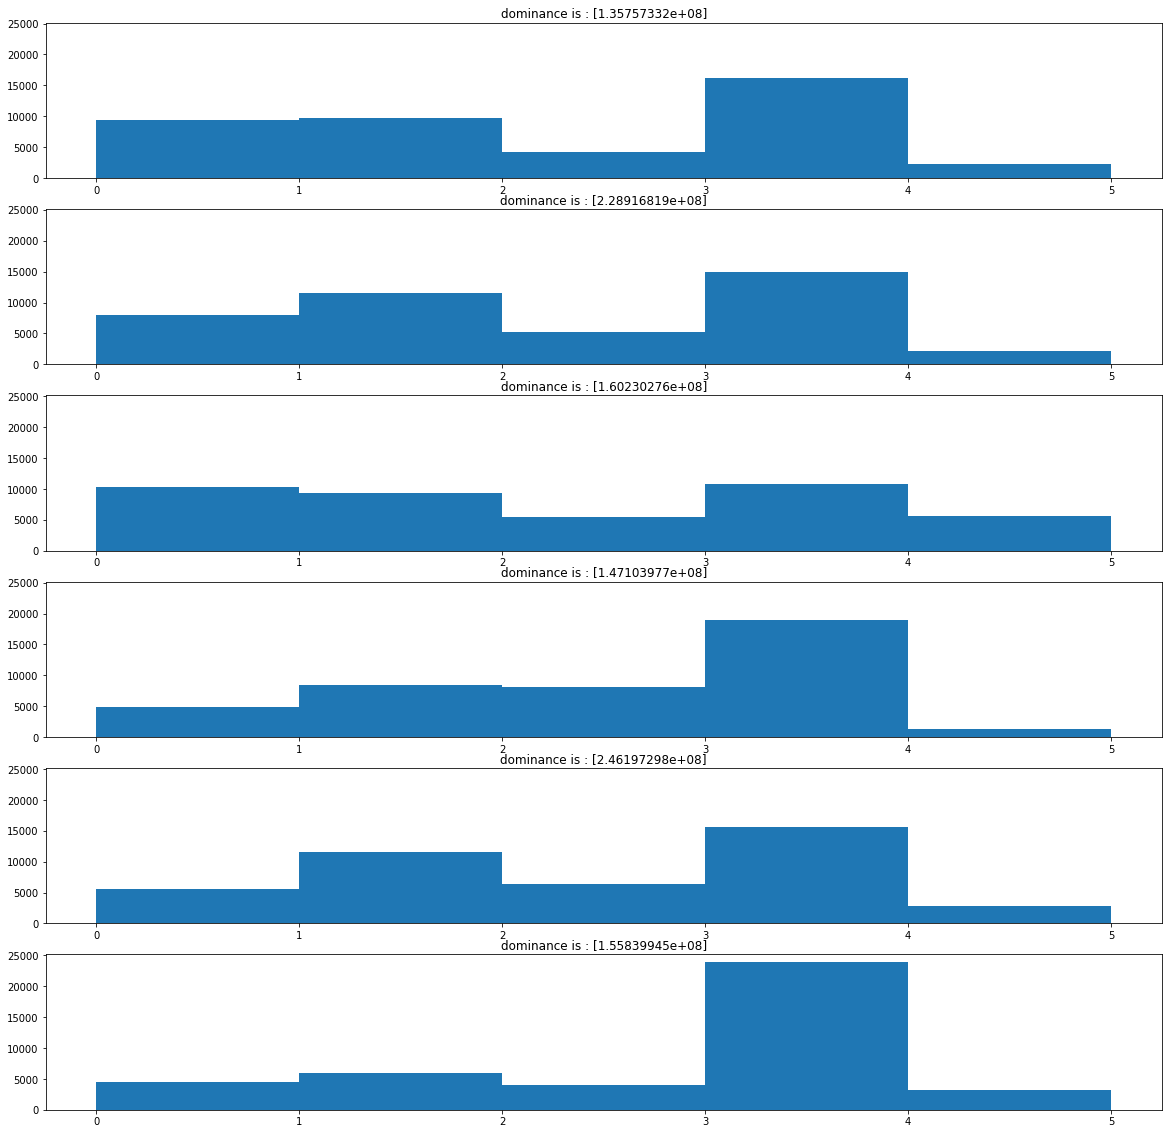

In [83]:
import numpy as np
from sklearn.mixture import GaussianMixture
maindatashape = np.shape(main_data)
f = np.reshape([main_data[:,:,:] ] , (maindatashape[0]*maindatashape[1] , 2) )
gmmcomp = 5
gm = GaussianMixture(n_components=gmmcomp, random_state=0).fit( f )
print(gm.means_)
print(gm.weights_)

fig , axs= plt.subplots(len(list_tag) ,figsize=(20,20), sharey=True)
for a in range(len(list_tag)):
    gmpred = gm.predict(main_data[a,:,:])
    
    axs[a].set_title("dominance is : " + str(correlations[a]))
    axs[a].hist(gmpred , bins = range(gmmcomp+1))
fig.savefig('result1.png')


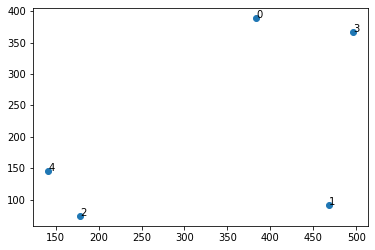

In [69]:
import matplotlib.pyplot as plt

fig= plt.figure()

f = np.array(range(gmmcomp))
for i, txt in enumerate(f):
    plt.annotate(txt, (gm.means_[i,0], gm.means_[i,1]))
    
plt.scatter(gm.means_[:, 0], gm.means_[:, 1])
plt.show()
fig.savefig('mapofplaces.png')

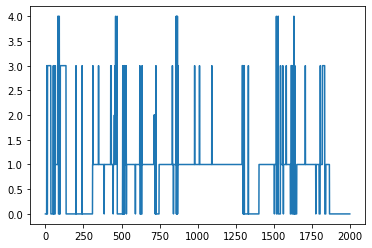

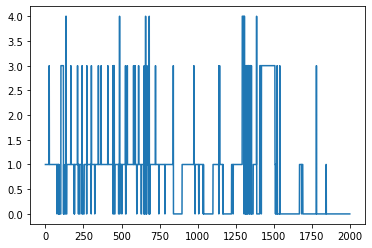

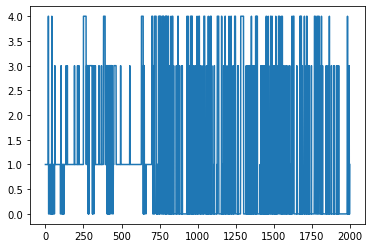

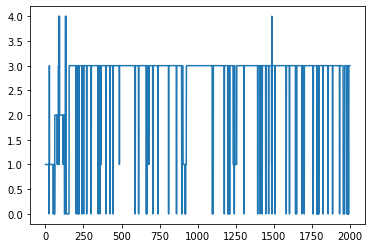

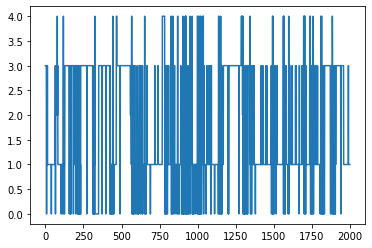

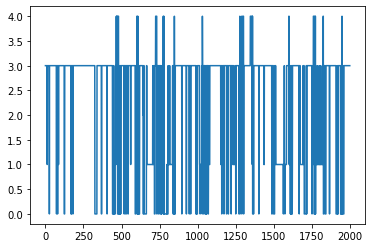

In [78]:


for a in range(len(list_tag)):
    fig = plt.figure()   
    gmpred = (gm.predict(main_data[a,8000:10000,:])   ).astype(int)
    plt.plot(gmpred )
    #plt.scatter(correlations[a] , len(gmpred[gmpred==1]))
    
fig.savefig('dominanceVsHome.png')